<a href="https://colab.research.google.com/github/GonzaloCasado91/ProyectoCoder-DataScience---Pre-Entrega/blob/main/Entrega/%20Pre_Entrega_2_CASADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Abstract 2) Objetivo 3) Preguntas de investigación 4) Data Adquisition 5) EDA 6) Feature Engineering 7) Modelos de ML

# PROYECTO DATA SCIENCE - COMISION - 42365
**ALMUNO**: *Gonzalo Casado*

**Tutor**: *Ruben Baquel*

---

---

### **1 - ABSTRACT:**

La ultima pandemia de COVID-19 tomó al mundo desprevenido, pocos países pudieron prepararse de manera acorde para enfrentarla debido a la rápida propagacion del virus. Algunos países tuvieron mas exito que otros en paliar los efectos de la pandemia. En este proyecto de investigacion utilizando herramientas de Data Science buscaremos determinar si hay realacion entre el GDP de una país, los medicos y camas disponibles al momento de paliar la pandemia.

---

---

### **2 - DEFINICION DE OBJETIVO E HIPOTESIS:**

# ***Objetivo:***

El objetivo de nuestro proyecto será el, de ser posible, aproximar la cantidad de camas hospitalarias y médicos necesesarios para reducir al minimo la cantidad de muertes por la pandemia. De esta manera buscaremos dar recomendaciones a los países para que implementen las políticas necesarias para alcanzar los valores optimos en los que se disminuyen las muertes y los contagios de ser posible.

CONTEXTO COMERCIAL:

Como mencionaramos anteriormente, la pandemia de COVID-19 llegó de manera imprevista afectando a todos los países por igual.
Si bien todos los países fueron afectados algunos pudieron controlar los casos y muertes por el virus de manera mas eficiente.

PROBLEMA COMERCIAL:

Intentaremos analizar que características poseen los países con menores muertes y casos por covid-19, de manera que podamos identificarlos como los "ganadores" en la carrera por salvar vidas en la pandemia.
Con esta identificacion de los países que mejor llevaron la pandemia podremos revisar que políticas implementaron o ya tenían implementadas al momento de enfrentar al virus.

CONTEXTO ANALITICO:

El dataset elegido para este proyecto contiene las siguientes columnas que caracterizan a cada país.

Las caracterísitcas que nos ayudaran a resolver nuestra problematica serán CAMAS DE HOSPITAL C/ 1000 PERSONAS, PERSONAL MEDICO C/1000 PERSONAS, GDP PER CAPITA, POBLACION TOTAL, TESTEOS DIARIOS, CASOS Y MUERTES.


# ***Hipotesis:***
La ultima pandemia de COVID-19 tomó al mundo desprevenido, pocos países pudieron prepararse de manera acorde para enfrentarla debido a la rápida propagacion del virus. Algunos países tuvieron mas exito que otros en paliar los efectos de la pandemia. Para este proyecto intentaremos responder las siguientes preguntas e hipotesis:

---
---

## **3 - Preguntas de Investigacion:**
1) La ubicacion geografica y por consiguiente, el efecto de la temperatura media del país afectó la cantidad de casos y muertes a lo largo del período del data set?

2) En un país de altos ingresos (GDP per capital por encima de la media) la pandemia fue mas leve?

3) Un GDP per capita mas alto es característica suficiente para mantener los casos y muertes por debajo de la media global?

4) Se relaciona un GDP mas alto de la con la cantidad de camas de hospital y medicos disponibles?


---



---


# 4 - **Data Adquisition**


Link data set elegído --> https://www.kaggle.com/datasets/sambelkacem/covid19-algeria-and-world-dataset

El Data set elegído para el Proyecto de la cursada corresponde a datos extraídos a nivel mundial acerca de la pandemia de COVID-19. La linea temporal para el data set se encuentra entre el 1 de Enero del 2020 hasta el 28 de Febrero del 2021.

En el mismo data set se cuenta con los siguientes datos característicos de cada país en distintas columnas. Su ubicacion geografica en latitud y longitud, la temperatura media del país para el período mensionado anteriormente, la cantidad de camas cada 1000 habitantes, la cantidad de médicos también cada 1000 habitantes. el GDP per capita del país, la poblacion total del país, el promedio de edad de los habitantes y el porcentaje de poblacion que es mayor de 65 años (grupo de riesgo).

Luego de las características de cada país el data set cuenta con los datos de Testeos diarios, Casos confirmados y muertes.


---



---



In [ ]:
## Importamos librearias a utilizar
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import datetime as dt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [ ]:
## Montamos en drive para luego leer el data set
drive.mount('mi_unidad')

Drive already mounted at mi_unidad; to attempt to forcibly remount, call drive.mount("mi_unidad", force_remount=True).


In [ ]:
%cd mi_unidad/ MyDrive/
%cd Proyecto Data Science/
%cd Pre-Entrega\ 1
%ls

/content/mi_unidad/ MyDrive
/content/mi_unidad/ MyDrive/Proyecto Data Science
/content/mi_unidad/ MyDrive/Proyecto Data Science/Pre-Entrega 1
CovidData.csv  Pre-Entrega1_CASADO.ipynb


In [ ]:
## Mostramos Dataset
df_covid = pd.read_csv('CovidData.csv')
df_covid

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,NaN,NaN
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,5.0,NaN,NaN
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,4.0,NaN,NaN
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,1.0,NaN,NaN
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38467,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-24,1804.0,35960.0,1456.0
38468,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-25,2965.0,35994.0,1458.0
38469,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-26,NaN,36044.0,1463.0
38470,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-27,NaN,36058.0,1463.0


In [ ]:
## Inspeccionamos el Dataset
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           38472 non-null  object 
 1   Continent                        38472 non-null  object 
 2   Latitude                         38472 non-null  float64
 3   Longitude                        38472 non-null  float64
 4   Average temperature per year     38472 non-null  int64  
 5   Hospital beds per 1000 people    38472 non-null  float64
 6   Medical doctors per 1000 people  38472 non-null  float64
 7   GDP/Capita                       38472 non-null  float64
 8   Population                       38472 non-null  int64  
 9   Median age                       38472 non-null  int64  
 10  Population aged 65 and over (%)  38472 non-null  int64  
 11  Date                             38472 non-null  object 
 12  Daily tests       



---


Mediante la método ".info" podemos observar que en las columnas Daily Tests, Cases y Deaths hay valores nulos.
Por otro lado podemos observar que el type de la columna "Date" es Object.

Para poder utiliar el data set, vamos a reemplazar los valores nulos por 0 y cambiaremos el type de la columna "Date" de "object" a "datatype" de manera que podamos exprimir la linea teamporal del dataset.


---
Los valores nulos en las columnas Daily Tests, Cases, Deaths corresponden a 0
testeos, 0 casos y 0.
Podemos afirmar esto dado que no todos los países se contagiaron al mismo tiempo sino que fueron contagiandose progresivamente a medida que la pandemia sujetos enfermos se trasladaban con el virus.

Por esta razon llenaremos los valores nulos con ceros.

---

In [ ]:
## Buscamos los valores faltantes
df_covid.isnull().sum()

Entity                                0
Continent                             0
Latitude                              0
Longitude                             0
Average temperature per year          0
Hospital beds per 1000 people         0
Medical doctors per 1000 people       0
GDP/Capita                            0
Population                            0
Median age                            0
Population aged 65 and over (%)       0
Date                                  0
Daily tests                        7895
Cases                               254
Deaths                             3610
dtype: int64

In [ ]:
## Llenamos los valores nulos por 0 y chequeamos el data
df_covid['Daily tests'] = df_covid['Daily tests'].fillna(0)
df_covid['Cases'] = df_covid['Cases'].fillna(0)
df_covid['Deaths'] = df_covid['Deaths'].fillna(0)
## Chequeamos el data set para estar seguros que no se escapo ningun valor nulo
df_covid.isnull().sum()

Entity                             0
Continent                          0
Latitude                           0
Longitude                          0
Average temperature per year       0
Hospital beds per 1000 people      0
Medical doctors per 1000 people    0
GDP/Capita                         0
Population                         0
Median age                         0
Population aged 65 and over (%)    0
Date                               0
Daily tests                        0
Cases                              0
Deaths                             0
dtype: int64

In [ ]:
##Seleccionamos la columna "Date" y cambiamos su tipo a "datatype"
df_covid['Date'] = pd.to_datetime(df_covid['Date'])
df_covid['Date'].dtype

dtype('<M8[ns]')

In [ ]:
## Mostramos nuevamnete el data set
df_covid.head(10)

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,0.0,0.0
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,5.0,0.0,0.0
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,4.0,0.0,0.0
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,1.0,0.0,0.0
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,8.0,0.0,0.0
5,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-03-01,3.0,0.0,0.0
6,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-03-02,2.0,0.0,0.0
7,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-03-03,5.0,0.0,0.0
8,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-03-04,6.0,0.0,0.0
9,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-03-05,8.0,0.0,0.0


## **5 - EDA - Exploracion de Datos:**

*Generaremos data sets provisorios para manejar los datos de manera mas favorable e intentaremos responder las preguntas planteadas en el apartado de "Preguntas de Investigacion"*

**Cabe aclarar que se utilizaron graficos de scatterplot dado que visualizaban los datos de mejor manera que otro tipo de graficos**

1) La ubicacion geografica y por consiguiente, el efecto de la temperatura media del país afectó la cantidad de casos y muertes a lo largo del período del data set?

GRAFICO 1:

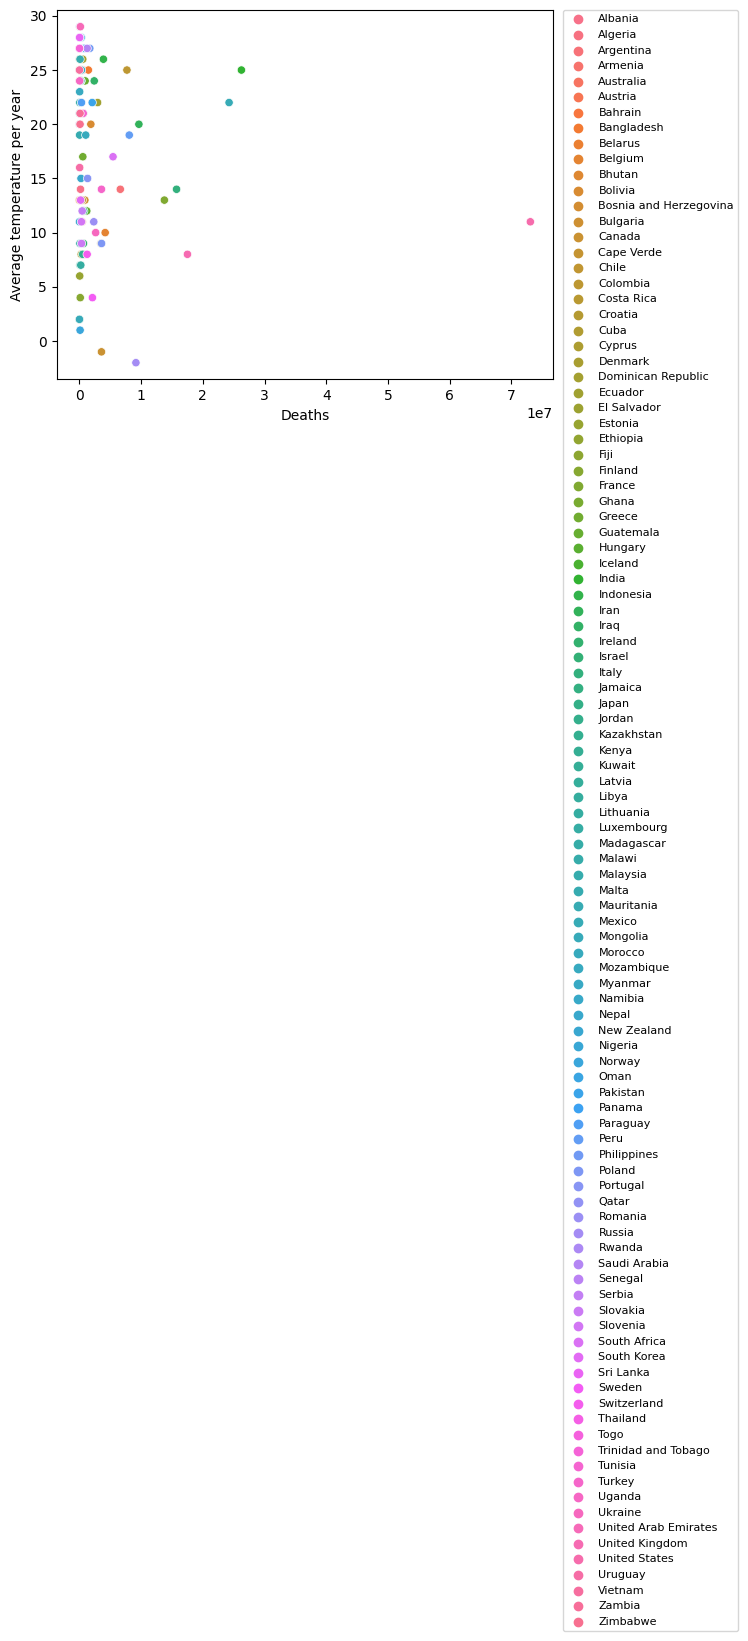

In [ ]:
## 1) La ubicacion geografica y por consiguiente, el efecto de la temperatura media del país afectó la cantidad de casos y muertes a lo largo del período del data set?

df_TempVSCasesvsDeaths = df_covid.groupby(by="Entity").agg({'Average temperature per year' : 'mean', 'Cases' : 'sum', 'Deaths' : 'sum'})
Grafico_1 = sns.scatterplot(data=df_TempVSCasesvsDeaths, x="Deaths", y="Average temperature per year", hue="Entity")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=8)


CONCLUSION:


> La distribucion observada en el Grafico 1, no demuestra una relacion entre la temperatura media de cada país y la cantidad de muertes. Para todo el rango de temperaturas se observan cantidad de muertes similares exceptuando algunos outliers.


> Se puede concluir que la temperatura del país, así como su posicion geografica no fue una característica que influya en como se desarollo la pandemia en ese país.





2) En un país de altos ingresos (GDP per capital por encima de la media) la pandemia fue mas leve (cantidad de casos)?

GRAFICO 2:

<Axes: xlabel='GDP/Capita', ylabel='Cases'>

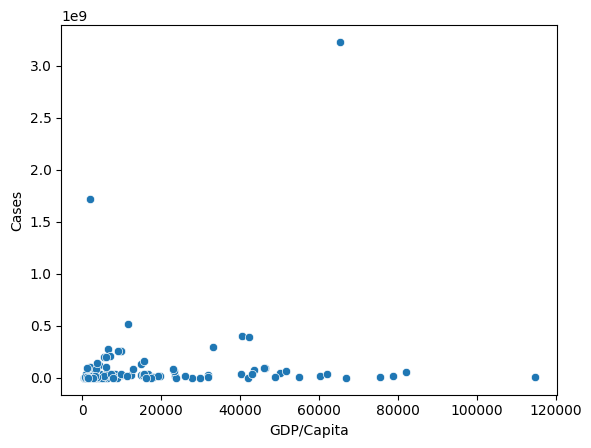

In [ ]:
## 2) En un país de altos ingresos (GDP per capital por encima de la media) la pandemia fue mas leve (cantidad de casos)?
df_GDPvsCases = df_covid.groupby(by='Entity').agg({'GDP/Capita':'mean', 'Cases':'sum'})
sns.scatterplot(df_GDPvsCases, x = 'GDP/Capita' , y = 'Cases')

Exceptuando los outliers no se observa una diferencia mayor diferencia entre un GPD per capita alto con una mayor o menor cantidad de Casos.

Por lo que podemos concluir que la cantidad de casos no se ve afectada por si el país es mas rico o mas pobre

3) Un GDP per capita mas alto es característica suficiente para mantener los casos y muertes por debajo de la media global?

GRAFICO 3


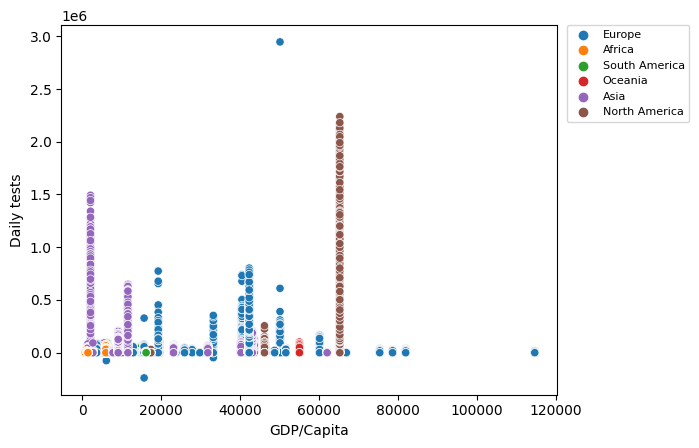

In [ ]:
# Buscamos la relacion ente un GDP alto y el promedio de testeos diarios de cada país
df_Test_GDP = df_covid[['Medical doctors per 1000 people','GDP/Capita' , 'Hospital beds per 1000 people', 'Daily tests', 'Continent']]
sns.scatterplot(df_Test_GDP, x = 'GDP/Capita' , y='Daily tests', hue = 'Continent')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=8)

Podemos observar en el GRAFICO 3 que hay una relacion entre el GDP per Capita y la cantidad de testeos diarios, se identifican los continentes a los que pertenece cada valor.
En el grafico podemos observar que continentes como Africa y Sur America poseen un bajo GDP per capita y un bajo testeo diario. Por el contrario países en los continentes Europeo y "Norte America" poseen un alto GDP/Capita y se observa tambien un alto testeo diario.

Los "outlier" que podríamos considerar en el caso de Asia deben estar dados por países con alto GDP como ser Japon, China y Korea del Sur.


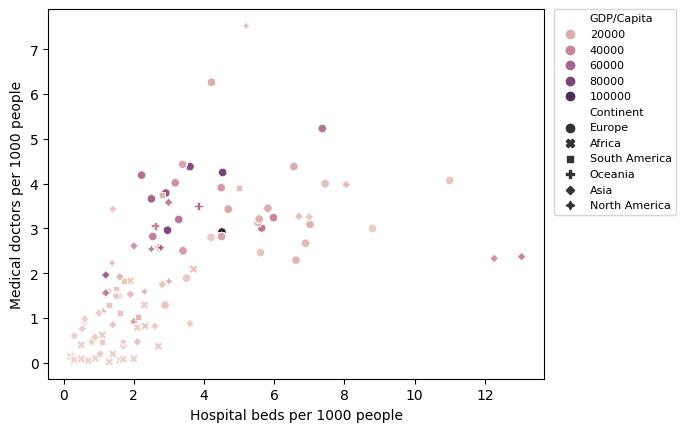

In [ ]:
# 4) Se relaciona un GDP mas alto con la cantidad de camas de hospital y medicos disponibles?
df_Test_GDP = df_covid[['Medical doctors per 1000 people','GDP/Capita' , 'Hospital beds per 1000 people', 'Continent']]
sns.scatterplot(df_Test_GDP, x = 'Hospital beds per 1000 people' , y='Medical doctors per 1000 people', hue = 'GDP/Capita', style = 'Continent')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=8)

El grafico 4 demuestra sin lugar a dudas que países con alto GDP per capita tienen a su disposicion mas camas de hospital y medicos cada 1000 personas.

Podemos evidenciarlo de manera mas clara al observar que lugar ocupan los países del "primer mundo"

### 6 - Feature Engineering

Seleccionaremos nuestra variable objetivo que será Deaths. Dado que una mayori disponibilidad de médicos y camas de hospital deberían disminuir el riesgo de muerte por COVID-19.

De acuerdo a la exploracion de datos anterior, podemos dicernir que tanto las temperaturas y ubicaciones de los países no influyeron en el cómo la pandemia afectó a cada país, por lo que podemos dejar de lado las variables categoricas "Entity" y "Continent" de nuestro Dataset, como también podemos eliminar las columnas de "Latitude" y "Longitud" y "Average temperature per year".

In [ ]:
df_covid_clean = df_covid.drop(['Entity', 'Continent','Latitude','Longitude', 'Average temperature per year'], axis = 1)
df_covid_clean

,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,0.0,0.0
1,2.89,1.29,5353.2,2873457,38,14,2020-02-26,5.0,0.0,0.0
2,2.89,1.29,5353.2,2873457,38,14,2020-02-27,4.0,0.0,0.0
3,2.89,1.29,5353.2,2873457,38,14,2020-02-28,1.0,0.0,0.0
4,2.89,1.29,5353.2,2873457,38,14,2020-02-29,8.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
38467,1.70,0.08,1464.0,16529904,19,3,2021-02-24,1804.0,35960.0,1456.0
38468,1.70,0.08,1464.0,16529904,19,3,2021-02-25,2965.0,35994.0,1458.0
38469,1.70,0.08,1464.0,16529904,19,3,2021-02-26,0.0,36044.0,1463.0
38470,1.70,0.08,1464.0,16529904,19,3,2021-02-27,0.0,36058.0,1463.0


In [ ]:
X = df_covid_clean.drop(['Deaths', 'Date'], axis = 1)
X

,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Daily tests,Cases
0,2.89,1.29,5353.2,2873457,38,14,8.0,0.0
1,2.89,1.29,5353.2,2873457,38,14,5.0,0.0
2,2.89,1.29,5353.2,2873457,38,14,4.0,0.0
3,2.89,1.29,5353.2,2873457,38,14,1.0,0.0
4,2.89,1.29,5353.2,2873457,38,14,8.0,0.0
...,...,...,...,...,...,...,...,...
38467,1.70,0.08,1464.0,16529904,19,3,1804.0,35960.0
38468,1.70,0.08,1464.0,16529904,19,3,2965.0,35994.0
38469,1.70,0.08,1464.0,16529904,19,3,0.0,36044.0
38470,1.70,0.08,1464.0,16529904,19,3,0.0,36058.0


In [ ]:
y = df_covid_clean['Deaths']
y

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
          ...  
38467    1456.0
38468    1458.0
38469    1463.0
38470    1463.0
38471    1463.0
Name: Deaths, Length: 38472, dtype: float64

In [ ]:
sfs = SFS(LinearRegression(),
          k_features=7,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

Nuestra variable target será "Deaths" que es lo que buscamos disminuir y nuestras Features elegidas seran las mostradas debajo.

In [ ]:
sfs.fit(X, y)
sfs.k_feature_names_

('Hospital beds per 1000 people',
 'Medical doctors per 1000 people',
 'Population',
 'Median age',
 'Population aged 65 and over (%)',
 'Daily tests',
 'Cases')




---



---


# **7) Modelos de ML**

###*Preparacion del modelo*

Para nuestro analisis vamos a utilizar un modelo de Regresion Lineal definiendo en y nuestra variable objetivo y en X el resto de las variables que intentaran explicarla.

In [ ]:
X = df_covid_clean.drop(['Deaths', 'Date'], axis = 1)
y = df_covid_clean['Deaths']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.8919526506105672


Si bien la metrica de r2 da que nuestro modelo se ajusta un 89% a los datos, debremos a medida que transcurra la cursada añadir otros modelos de regresion linear para poder compararlos y poder discernir si el modelo elegído es correcto o debemos intentar buscar la prediccion con nuevos modelos.